<a href="https://colab.research.google.com/github/Deepish-S/Machine_Learning/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("data.csv")
df.head()

,country,age,salary,puchased
0,France,NaN,7200,NO
1,Spain,27.0,4800,yes
2,Germany,30.0,5400,yes
3,UK,49.0,98000,NO


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df.tail()

,country,age,salary,puchased
0,France,44.0,7200.0,NO
1,Spain,27.0,4800.0,yes
2,Germany,30.0,5400.0,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   3 non-null      object 
 1   age       3 non-null      float64
 2   salary    3 non-null      float64
 3   puchased  3 non-null      object 
dtypes: float64(2), object(2)
memory usage: 224.0+ bytes


In [ ]:
df.describe()

,age,salary
count,3.000000,3.0000
mean,33.666667,5800.0000
std,9.073772,1248.9996
min,27.000000,4800.0000
25%,28.500000,5100.0000
50%,30.000000,5400.0000
75%,37.000000,6300.0000
max,44.000000,7200.0000


In [ ]:
df.isnull().sum()

country     0
age         1
salary      0
puchased    0
dtype: int64

In [ ]:
#df["Age"].fillna(df["Age"].mean(),inplace=True)
#df["Salary"].fillna(df["Salary"].mean(),inplace=True)

KeyError: 'Age'

In [ ]:
df["age"].fillna(df["age"].mean(),inplace=True)
df["salary"].fillna(df["salary"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

country     0
age         0
salary      0
puchased    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
x=df.iloc[:,:-1].values
x



array([['France', 35.333333333333336, 7200],
       ['Spain', 27.0, 4800],
       ['Germany', 30.0, 5400],
       ['UK', 49.0, 98000]], dtype=object)

In [ ]:
y=df.iloc[:,3:].values
y


array([['NO'],
       ['yes'],
       ['yes'],
       ['NO']], dtype=object)

In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy="mean")

x[:,1:3]=imp.fit_transform(x[:,1:3])
x

array([['France', 35.333333333333336, 7200.0],
       ['Spain', 27.0, 4800.0],
       ['Germany', 30.0, 5400.0],
       ['UK', 49.0, 98000.0]], dtype=object)

In [ ]:
y

array([['NO'],
       ['yes'],
       ['yes'],
       ['NO']], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
h=le.fit_transform(x[:,0])
h

array([0, 2, 1, 3])

In [ ]:
y=le.fit_transform(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transform=ColumnTransformer([("norm1",OneHotEncoder(),[0])],remainder='passthrough')
x=transform.fit_transform(x)
x

array([[1.0, 0.0, 0.0, 0.0, 44.0, 7200.0],
       [0.0, 0.0, 1.0, 0.0, 27.0, 4800.0],
       [0.0, 1.0, 0.0, 0.0, 30.0, 5400.0],
       [0.0, 0.0, 0.0, 1.0, 49.0, 98000.0]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,4:6]=sc.fit_transform(x_train[:,4:6])
x_train

array([[0.0, 0.0, 0.0, 1.0, 0.9557896392964647, 1.4138527953056175],
       [0.0, 0.0, 1.0, 0.0, -1.3805850345393378, -0.7345887349522664],
       [1.0, 0.0, 0.0, 0.0, 0.4247953952428732, -0.679264060353351]],
      dtype=object)

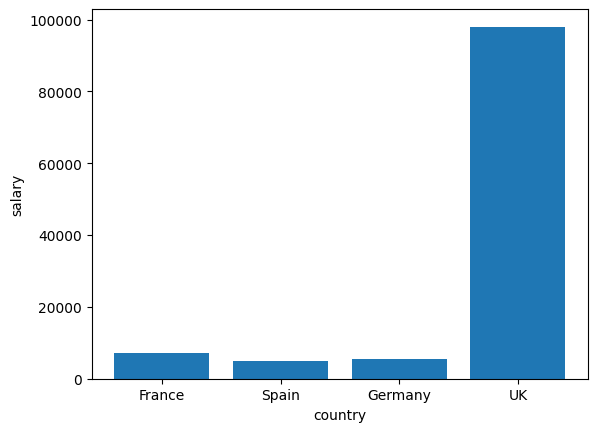

In [ ]:
plt.bar(df["country"],df["salary"])
plt.xlabel("country")
plt.ylabel("salary")
plt.show()

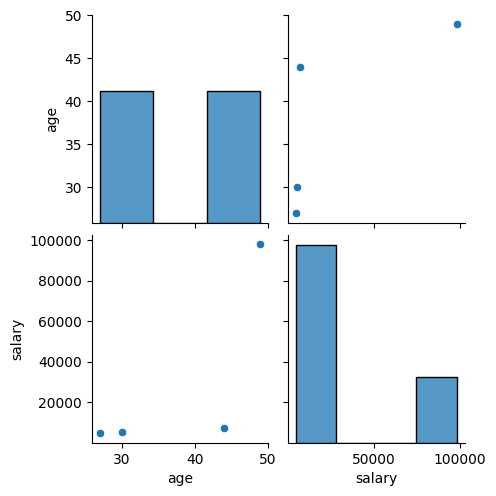

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df

,country,age,salary,puchased
0,France,44,7200,NO
1,Spain,27,4800,yes
2,Germany,30,5400,yes
3,UK,49,98000,NO


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample data
colors = np.array(['red', 'green', 'blue', 'red', 'blue']).reshape(-1, 1)

colors.shape
colors

array([['red'],
       ['green'],
       ['blue'],
       ['red'],
       ['blue']], dtype='<U5')

In [ ]:
encoder = OneHotEncoder()

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(colors)
one_hot_encoded
# Convert the sparse matrix to a dense array for visualization
one_hot_encoded_array = one_hot_encoded.toarray()

# Display the one-hot encoded array
print(one_hot_encoded_array)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


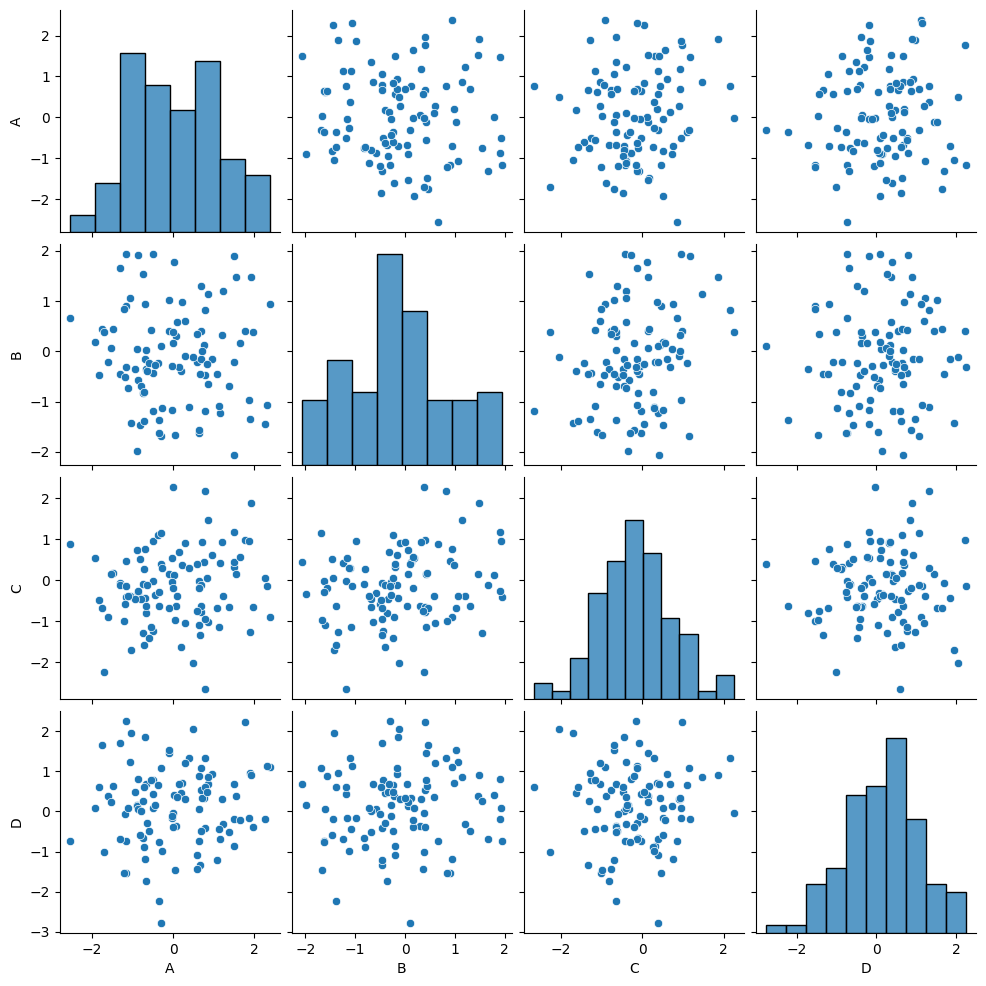

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(0)
data = pd.DataFrame(np.random.randn(100, 4), columns=['A', 'B', 'C', 'D'])

# Add a categorical variable
data['Category'] = np.random.choice(['X', 'Y', 'Z'], 100)

# Visualize the pairwise relationships using pairplot
sns.pairplot(data)